# Introduction

In this notebook, we will train a neural network using Tensorflow to classify clothing images.
[Reference](https://www.tensorflow.org/tutorials/keras/classification)

We will be using the Animal data in this notebook

# Imports

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
#handles various images operations
import os
#Instantly make your loops show a smart progress meter
from tqdm import tqdm
import random

Data contains 90 animal categories and 60 images for each category

# Load the data

DATADIR = "animals/training_set"

for category in animals_dataset:  # folder names are the categories
    path = os.path.join(DATADIR, category)  # create path to animals
    class_num = animals_dataset.index(category) # get the classification  (0 .. 89). 0=antelop 1=..
    for img in os.listdir(path):  # iterate over each image per category
        img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
    break  #...and one more!

basically images will have different shapes because they have different sizes 

The images have to be resized to one size this can be changed for best quality with enough visibility but least size

In [2]:
file = open("animals.txt")
file_contents = file.read()
animals_dataset = file_contents.splitlines()

In [3]:
training_data = []
IMG_SIZE = 100
DATADIR = "animals/"

def create_training_test_dataset(img_path):
    for category in animals_dataset:  # do dogs and cats

        path = os.path.join(DATADIR + img_path, category)  # create path to dogs and cats
        class_num = animals_dataset.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))


    return training_data

In [ ]:
training_dataset = create_training_test_dataset("training_set")

In [6]:
test_dataset = create_training_test_dataset("test_set")

100%|██████████████████████████████████████████| 49/49 [00:00<00:00, 147.87it/s]


In [7]:
print(len(training_data))
print(len(test_dataset))

5400


In [ ]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

Visualising samples from training set

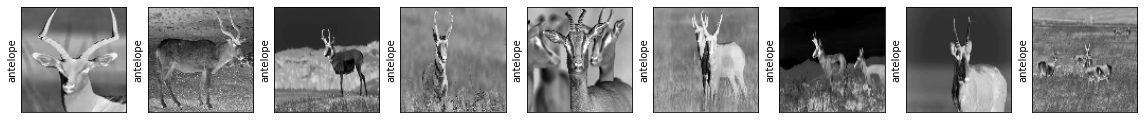

In [14]:
plt.figure(figsize=(20, 20))
for i in range(9):
    plt.subplot(3, 9, i + 1)
    plt.xticks([])
    plt.yticks([])
    #plt.imshow(img_array, cmap='gray')
    image, label = training_data[i]
    plt.imshow(image, cmap=plt.cm.binary)
    plt.ylabel(animals_dataset[label])
plt.show()

DATADIR = "animals/"
IMG_SIZE = 100
#class create_training_test_dataset:
#def __init__(self, dataPath):
#self.dataPath = dataPath
     
def create_training_test_dataset(dataPath):
    training_data = []   
    for category in animals_dataset: 
        path = os.path.join(DATADIR + dataPath, category) # create path to animals
        class_num = animals_dataset.index(category)  # get the classification  (0 .. 90). 0=antelope 1=...
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                # resize to normalize data size
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                # add this to our training_data    
                training_data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
    
    return training_data

Shuffle the data. else the classifier will learn wrongly

In [21]:
random.shuffle(training_data)
random.shuffle(test_dataset)

We have got the classes nicely mixed in

In [39]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
print(y[10])

71


In [17]:
for sample in training_data[:20]:
    print(sample[1])

31
26
3
37
55
49
20
31
24
83
17
25
17
29
27
44
89
12
65
71


In [40]:
import pickle

pickle_out = open("X_TRAIN.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_TRAIN.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

We can always load it in to our current script, or a totally new one by doing

pickle_in = open("X.pickle","rb")
X_TRAIN = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y_TRAIN  = pickle.load(pickle_in)


In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X_TRAIN.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_TRAIN.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-03-25 23:04:03.100244: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Building the model

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       2560      
                                                                 
 activation (Activation)     (None, 98, 98, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 256)       590080    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 256)      0         
 2D)                                                    

* **Flatten layer** converts the 2D array to a 1D array (28 x 28 = 784 dimensions)
* **Dense layer** deeply connects with its preceding layer, i.e. all neurons of the layer are connected to every neuron of its preceding layer. Neurons in the deep layer receiv output from every neuron of its preceding layer, where neurons of the dense layer perform matrix-vector multiplication.
* One Dense layer with **128 nodes**
* One Dense layer with **10 nodes** which returns an array of length 10. Each node contains a score indicating the current images' probability of belong to each of the classes 

In [ ]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

In [180]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compliling and Training

* We use **SparseCategoricalCrossentropy** loss function because there are more than two label classes and the labels are integers.
* We could use **CategoricalCrossentropy** loss function as well in this case, but the labels would have to be one_hot encoded

## Evaluate

In [183]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Validation Loss: {}, Validation Accuracy: {}".format(test_loss, test_accuracy))

313/313 [==============================] - 0s 658us/step - loss: 0.3437 - accuracy: 0.8809
Validation Loss: 0.34370264410972595, Validation Accuracy: 0.8809000253677368


We use Softmax layer to generate normalised probabilities for better comprehension and interpration

In [65]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

## Visualisation

In [159]:
def plot_image(i, predictions_array, true_label, img):
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#7d4646")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

The Flatten layer expects the input for its layer in the form of (batch, .... channel_last) or (batch, channel_first, ....), so we need to transform each image so that we have the batch size mentioned with the input as well. Our input shapefor each image will then become (1, 28, 28)

T-shirt/top


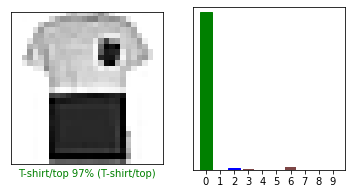

In [160]:
i = 120

# Prediction
image = tf.convert_to_tensor(test_images[i])
image_batch = tf.expand_dims(image, [0])
prediction = probability_model.predict(image_batch)
print(class_names[np.argmax(prediction)])

# Plotting
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[0], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, prediction[0],  test_labels[i])
plt.show()

## Overcoming Overfitting

In the first model we notice overfitting, which is evident from the fact that the accuracy on the test dataset is a little less than the accuracy on the training dataset. We use L2 regularization and Dropout to overcome that

In [210]:
combined_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
])

In [211]:
combined_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics = ['accuracy'])
combined_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 983us/step - loss: 0.6974 - accuracy: 0.7658
Epoch 2/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.4437 - accuracy: 0.8501
Epoch 3/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.4135 - accuracy: 0.8625
Epoch 4/10
1875/1875 [==============================] - 2s 978us/step - loss: 0.4044 - accuracy: 0.8683
Epoch 5/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.3953 - accuracy: 0.8722
Epoch 6/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.3918 - accuracy: 0.8735
Epoch 7/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.3830 - accuracy: 0.8772
Epoch 8/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.3691 - accuracy: 0.8791
Epoch 9/10
1875/1875 [==============================] - 2s 984us/step - loss: 0.3731 - accuracy: 0.8817
Epoch 10/10
1875/1875 [==============================] - 2s 951u

In [212]:
combined_model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 898us/step - loss: 0.3981 - accuracy: 0.8762


[0.3980819284915924, 0.8762000203132629]